# Cabbage disease Detection Model using VGG16

In [1]:
#Importing Libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D,Dropout,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import cv2
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt
from glob import glob

In [2]:
#Lets see our tensorflow version
print(tf.__version__)

2.3.1


In [3]:
IMAGE_SIZE = [224, 224] #Resizing our image

train_path="Downloads/cabbage/train/*"#directory of train images
test_path="Downloads/cabbage/test/*"#directory of test images

In [5]:
# getting number of output classes
folders = glob("Downloads/cabbage/train/*")
folders

[]

In [7]:

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)##include top false because our vgg16 has 1000 output 
classes and in our case we have   only 3 classes

In [8]:
vgg.summary()##summary of our model

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:

# We are not training existing weights
for layer in vgg.layers:
 layer.trainable = False

In [10]:
# flattening the output
x = Flatten()(vgg.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)##adding dense layer as output

In [12]:
# create a model object
model = Model(inputs = vgg.input, outputs = prediction)


In [13]:
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [16]:
# tell the model what loss and optimization method to use
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data Augmentation

In [1]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
training_set = train_datagen.flow_from_directory("Downloads/cabbage/train", target_size = (224, 224),
 batch_size = 32, class_mode = 'categorical')

Found 240 images belonging to 3 classes.


In [22]:
test_set = train_datagen.flow_from_directory('Downloads/cabbage/test', target_size = (224, 224),
 batch_size = 32, class_mode = 'categorical')

Found 60 images belonging to 3 classes.


In [23]:
# fit the model
vgg_model = model.fit_generator(training_set, validation_data = test_set, epochs
= 10, steps_per_epoch = len(training_set),
 validation_steps = len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
2/2 [==============================] - 77s 38s/step - loss: 2.0155 - accuracy: 0.4333 - val_loss: 1.4355 - val_accuracy: 0.6000
Epoch 2/10
2/2 [==============================] - 77s 38s/step - loss: 0.7811 - accuracy: 0.7833 - val_loss: 0.3108 - val_accuracy: 0.9167
Epoch 3/10
2/2 [==============================] - 80s 40s/step - loss: 0.4705 - accuracy: 0.7833 - val_loss: 0.3415 - val_accuracy: 0.9333
Epoch 4/10
2/2 [==============================] - 77s 39s/step - loss: 0.2813 - accuracy: 0.9500 - val_loss: 0.0475 - val_accuracy: 0.9667
Epoch 5/10
2/2 [==============================] - 82s 41s/step - loss: 0.0451 - accuracy: 0.9667 - val_loss: 0.0239 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 79s 39s/step - loss: 0.0309 - accuracy: 0.9833 - val_loss: 0.0264 - val_accuracy: 0.9833
Epoch 7/10
2/2 [==============================] - 84s 42s/step - loss: 0.0562 - accuracy: 

In [24]:
vgg_model.history

{'loss': [2.015467882156372,
  0.7811390161514282,
  0.4704674184322357,
  0.28134241700172424,
  0.045084722340106964,
  0.030888106673955917,
  0.0562213659286499,
  0.06244415417313576,
  0.01372536364942789,
  0.005399006884545088],
 'accuracy': [0.4333333373069763,
  0.7833333611488342,
  0.7833333611488342,
  0.949999988079071,
  0.9666666388511658,
  0.9833333492279053,
  0.9666666388511658,
  0.9666666388511658,
  1.0,
  1.0],
 'val_loss': [1.4354594945907593,
  0.3108004927635193,
  0.341465562582016,
  0.04750725254416466,
  0.023879939690232277,
  0.0263996422290802,
  0.029203815385699272,
  0.03598577901721001,
  0.011129621416330338,
  0.01039824914187193],
 'val_accuracy': [0.6000000238418579,
  0.9166666865348816,
  0.9333333373069763,
  0.9666666388511658,
  1.0,
  0.9833333492279053,
  1.0,
  1.0,
  1.0,
  1.0]}

# Plotting loss and accuracy of the model

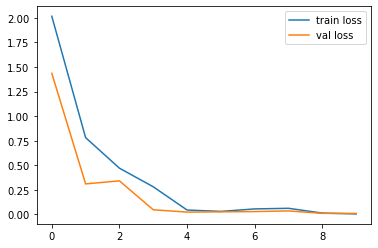

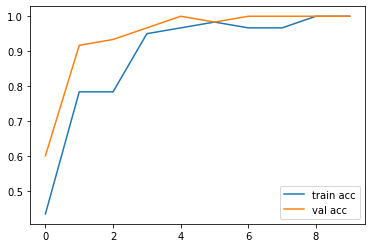

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
plt.plot(vgg_model.history['loss'], label='train loss')
plt.plot(vgg_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(vgg_model.history['accuracy'], label='train acc')
plt.plot(vgg_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Saving the model

In [26]:
# save the model as a h5 file
from tensorflow.keras.models import load_model
model.save('cabbage.h5')

# prediction on test data

In [27]:

# prediction of test data
y_pred = model.predict(test_set)
y_pred


array([[3.61327868e-04, 2.64409726e-04, 9.99374330e-01],
       [9.98727143e-01, 1.27269828e-03, 7.39624895e-08],
       [1.83676998e-03, 9.98162806e-01, 5.29987233e-07],
       [7.00559060e-04, 4.90999082e-04, 9.98808503e-01],
       [4.31673361e-05, 5.48944581e-06, 9.99951363e-01],
       [9.99925852e-01, 7.27758379e-05, 1.34082404e-06],
       [9.99995708e-01, 4.15254999e-06, 6.59320136e-08],
       [1.55681337e-05, 9.99984264e-01, 1.63619319e-07],
       [9.99886036e-01, 1.13973292e-04, 1.46916097e-08],
       [1.41257507e-04, 1.27358609e-04, 9.99731362e-01],
       [7.57951493e-05, 2.13778621e-05, 9.99902844e-01],
       [5.51900943e-04, 9.99448001e-01, 1.33396910e-07],
       [2.83891481e-04, 2.73524493e-04, 9.99442518e-01],
       [2.63539189e-03, 9.97326374e-01, 3.81681602e-05],
       [8.16214755e-02, 9.18371260e-01, 7.17691637e-06],
       [1.18532289e-05, 9.99988079e-01, 6.85436703e-08],
       [9.46352957e-04, 9.99053419e-01, 2.46522234e-07],
       [1.39816657e-05, 9.99985

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1,
       2, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2], dtype=int64)

# Let Us Display different categories of images

Text(0.5, 1.0, 'Backmoth')

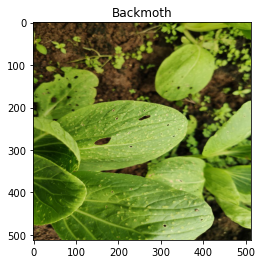

In [30]:
plt.imshow(plt.imread("Downloads/cabbage/test/Backmoth/Backmoth87.jpg"))
plt.title('Backmoth')

Text(0.5, 1.0, 'Leafminer')

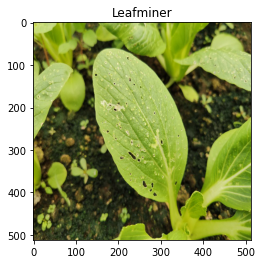

In [37]:
plt.imshow(plt.imread("Downloads/cabbage/test/Leafminer/Leafminer92.jpg"))
plt.title('Leafminer')

Text(0.5, 1.0, 'Mildew')

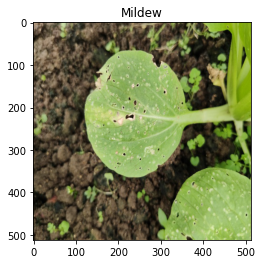

In [39]:
plt.imshow(plt.imread("Downloads/cabbage/test/Mildew/Mildew282.jpg"))
plt.title('Mildew')

In [31]:
# load the model for prediction
vgg_load = load_model('cabbage.h5')

In [33]:
def prepare(filepath):
 img_array = cv2.imread(filepath, cv2.IMREAD_COLOR) # Reading the file
 img_array = img_array / 255 ##rescaling the image
 new_array = cv2.resize(img_array, (224, 224)) # resizing the img_array to (224,224)
 return new_array.reshape(-1, 224, 224, 3) # reshaping the new data
model = tf.keras.models.load_model("cabbage.h5")

# Prediction

In [34]:
##let us predict one image
prediction = model.predict([prepare("Downloads/cabbage/test/Backmoth/Backmoth83.jpg")])
np.argmax(prediction)


0

In [35]:
class_dict = training_set.class_indices
class_dict##displaying our classes


{'Backmoth': 0, 'Leafminer': 1, 'Mildew': 2}

In [36]:

if np.argmax(prediction) == 0:
 print("Backmoth")
elif np.argmax(prediction) == 1:
 print("Leafminer")
else:
 print("Mildew")

Backmoth
